**A Food Magazine: Eat Safe, Love**

In [1]:
# Importing dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assigning the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# reviewing the collections in our database
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'gardenDB', 'local', 'met', 'petsitly_marketing', 'test', 'travel_db', 'uk_food']


In [5]:
# assigning the collection to a variable
establishments = db['establishments']

In [6]:
# reviewing a document in the establishments collection
pprint(db.establishments.find_one())

{'AddressLine1': 'Wear Bay Road',
 'AddressLine2': 'Folkestone',
 'AddressLine3': 'Kent',
 'AddressLine4': '',
 'BusinessName': 'Wear Bay Bowls Club',
 'BusinessType': 'Pub/bar/nightclub',
 'BusinessTypeID': 7843,
 'ChangesByServerID': 0,
 'Distance': 4591.821311183521,
 'FHRSID': 647177,
 'LocalAuthorityBusinessID': 'PI/000041489',
 'LocalAuthorityCode': '188',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'CT19 6PY',
 'RatingDate': '2014-03-31T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('6553d9729def13b02859e756'),
 'geocode': {'latitude': 51.086058, 'longitude': 1.196408},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/647177',
            'rel': 'self'}],
 'meta': {'dataSource': None,
          'extrac

## Part 3: Exploratory Analysis
* Using `count_documents` to display the number of documents contained in the result
* Displaying the first document in the results using `pprint`
* Converting the result to a Pandas DataFrame
* Printing the number of rows in the DataFrame
* Displaying the first 10 rows

'Eat Safe, Love' magazine had specific questions they need to get answered which will help them find the locations they wish to visit and avoid!

### 1. Which establishments have a hygiene score equal to 20?

In [7]:
# Finding the establishments with a hygiene score of 20
query = {'scores.Hygiene': 20}

# Using count_documents to display the number of documents in the result
count = establishments.count_documents(query)
print(f"There are {count} establishments with a hygiene score of 20")

# Displaying the first document in the results using pprint
pprint(establishments.find_one(query))

There are 41 establishments with a hygiene score of 20
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': '0',
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('6553d9739def13b0285a0294'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self

In [8]:
# Converting the result to a Pandas DataFrame
df = pd.DataFrame(establishments.find(query))
# Displaying the number of rows in the DataFrame
print(f" There are {len(df)} rows in the DataFrame")
# Displaying the first 10 rows of the DataFrame
df.head(10)

 There are 41 rows in the DataFrame


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,6553d9739def13b0285a0294,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,6553d9739def13b0285a0608,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,6553d9739def13b0285a0916,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,6553d9739def13b0285a0b09,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,6553d9739def13b0285a0b16,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,6553d9739def13b0285a14ba,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,6553d9739def13b0285a16d7,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,6553d9739def13b0285a2c02,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,6553d9739def13b0285a3045,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [9]:
# Finding the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query_london = {"LocalAuthorityName":  {'$regex': "London"}, 'RatingValue': {'$gte': '4'}}

# Using count_documents to display the number of documents in the result
print(f"There are {establishments.count_documents(query_london)} establishments in London with a hygiene score of 4 or more")
# Displaying the first document in the results using pprint
pprint(establishments.find_one(query_london))

There are 33 establishments in London with a hygiene score of 4 or more
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': '4',
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('6553d9739def13b0285a1cac'),
 'geocode': {'latitude': 51.369321, 'longitude': 0.508551},
 'links': [{'href': 'https://a

In [10]:
# Converting the result to a Pandas DataFrame
df2 = pd.DataFrame(establishments.find(query_london))
# Displaying the number of rows in the DataFrame
print(f" There are {len(df2)} rows in the DataFrame with a Rating Value of 4 or more in London")
# Displaying the first 10 rows of the DataFrame
df.head(10)

 There are 33 rows in the DataFrame with a Rating Value of 4 or more in London


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,6553d9739def13b0285a0294,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,6553d9739def13b0285a0608,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,6553d9739def13b0285a0916,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,6553d9739def13b0285a0b09,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,6553d9739def13b0285a0b16,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,6553d9739def13b0285a14ba,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,6553d9739def13b0285a16d7,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,6553d9739def13b0285a2c02,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,6553d9739def13b0285a3045,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [11]:
# Searching within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sorting by hygiene score
# goecode of Penang Flavours "longitude": 0.08384000, "latitude":51.49014200

degree_search = 0.01
latitude = 51.49014200
longitude = 0.08384000

query_ratingvalue5 = {'geocode.latitude': {'$gte': latitude - degree_search, '$lte': latitude + degree_search},
         'geocode.longitude': {'$gte': longitude - degree_search, '$lte': longitude + degree_search},
         'RatingValue': '5'}
sort =  [('scores.Hygiene', 1)]
limit = 5

result_ratingvalue5 = list(establishments.find(query_ratingvalue5).sort(sort).limit(limit))
# Printing the results
print(f"Number of establishments with a Rating Value of 5 is", len(query_ratingvalue5))
pprint(result_ratingvalue5)


Number of establishments with a Rating Value of 5 is 3
[{'AddressLine1': '130 - 132 Plumstead High Street',
  'AddressLine2': '',
  'AddressLine3': 'Plumstead',
  'AddressLine4': 'Greenwich',
  'BusinessName': 'Volunteer',
  'BusinessType': 'Pub/bar/nightclub',
  'BusinessTypeID': 7843,
  'ChangesByServerID': 0,
  'Distance': 4646.965634598608,
  'FHRSID': 694609,
  'LocalAuthorityBusinessID': 'PI/000116619',
  'LocalAuthorityCode': '511',
  'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
  'LocalAuthorityName': 'Greenwich',
  'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'SE18 1JQ',
  'RatingDate': '2019-08-05T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': '5',
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('6553d9749def13b0285a5afc'),
  'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
  'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/694609',

In [12]:
# Converting the result to Pandas DataFrame
result_ratingvalue5_df = pd.DataFrame(result_ratingvalue5)
result_ratingvalue5_df

,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,6553d9749def13b0285a5afc,694609,0,PI/000116619,Volunteer,Pub/bar/nightclub,7843,130 - 132 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.09208, 'latitude': 51.4873437}",,4646.965635,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,6553d9749def13b0285a5b06,695241,0,PI/000179088,Plumstead Manor Nursery,Caring Premises,5,Plumstead Manor School Old Mill Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0859939977526665, 'latitude': ...",,4646.974010,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,6553d9749def13b0285a5b08,694478,0,PI/000086506,Atlantic Fish Bar,Takeaway/sandwich shop,7844,35 Lakedale Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0912164, 'latitude': 51.4867296}",,4646.974612,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,6553d9749def13b0285a5ac1,695223,0,PI/000178842,Iceland,Retailers - supermarkets/hypermarkets,7840,144 - 146 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0924199968576431, 'latitude': ...",,4646.946071,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,6553d9749def13b0285a5ad1,1380578,0,14425,Howe and Co Fish and Chips - Van 17,Mobile caterer,7846,Restaurant And Premises 107A Plumstead High St...,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0925370007753372, 'latitude': ...",,4646.955931,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [13]:
# Creating a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest
match = {'$match': {'scores.Hygiene': 0}} 

group = {'$group': {'_id': '$LocalAuthorityName', 'count': {'$sum': 1}}}

sort = {'$sort': {'count': -1}}

pipeline = [match, group, sort]
# Printing the number of documents in the result
results = list(establishments.aggregate(pipeline))
print(f" The number of documents are {len(results)}")
# Printing the first 10 results
pprint(results[:10])

 The number of documents are 55
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [19]:
# Converting the result to a Pandas DataFrame
df_agg = pd.DataFrame(results)
# Displaying the number of rows in the DataFrame
print(f" The number of rows in the dataframe is {len(df_agg)}")
# Displaying the first 10 rows of the DataFrame
df_agg.head(10)

 The number of rows in the dataframe is 55


,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


Text(0.5, 1.0, 'Number of Establishments with a Hygiene Score of 0')

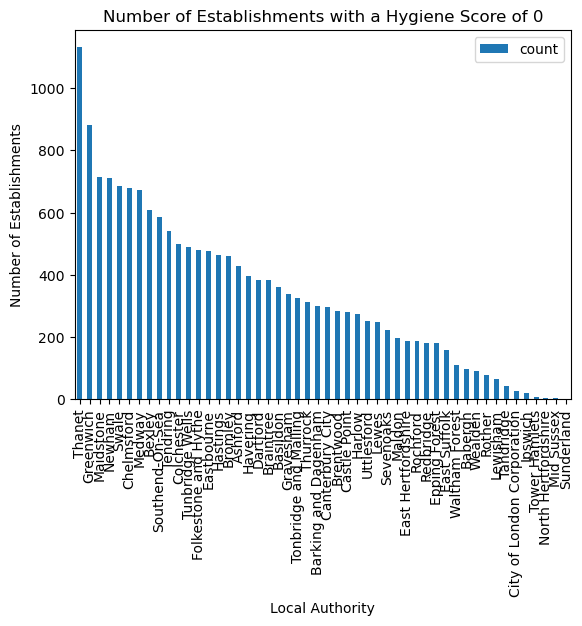

In [28]:
# plotting a bar chart of df_agg for 50 Local Authority area with a hygiene score of 0
plt = df_agg.head(50).plot(x='_id', y='count', kind='bar')
plt.set_xlabel("Local Authority")
plt.set_ylabel("Number of Establishments")
plt.set_title("Number of Establishments with a Hygiene Score of 0")